**Install the requried package for Recommendation system**

In [1]:
import sys
import os
import collections
from collections import defaultdict
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
import re
import seaborn as sns

Import all required libraries

In [ ]:
data = pd.read_csv("Reviews.csv")
data

In [3]:
data.shape

(568454, 10)

In [4]:
data = data.dropna()

In [5]:
print('Number of unique product in Raw data = ', data['ProductId'].nunique())

Number of unique product in Raw data =  74258


In [6]:
rows,columns=data.shape
print('Number of rows: ',rows)
print('Number of columns: ',columns)

Number of rows:  568411
Number of columns:  10


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 568411 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568411 non-null  int64 
 1   ProductId               568411 non-null  object
 2   UserId                  568411 non-null  object
 3   ProfileName             568411 non-null  object
 4   HelpfulnessNumerator    568411 non-null  int64 
 5   HelpfulnessDenominator  568411 non-null  int64 
 6   Score                   568411 non-null  int64 
 7   Time                    568411 non-null  int64 
 8   Summary                 568411 non-null  object
 9   Text                    568411 non-null  object
dtypes: int64(5), object(5)
memory usage: 47.7+ MB


In [8]:
data['Score'].describe().transpose()

count    568411.000000
mean          4.183309
std           1.310368
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: Score, dtype: float64

In [9]:
print('Minimum rating is product: %d' %(data.Score.min()))
print('Maximum rating is product: %d' %(data.Score.max()))

Minimum rating is product: 1
Maximum rating is product: 5


D:\program\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
D:\program\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


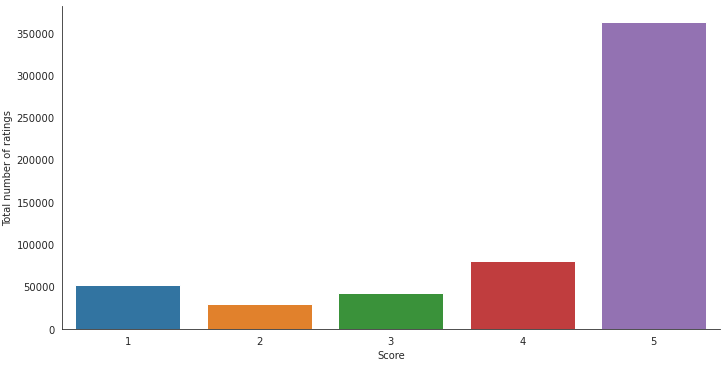

In [10]:
import seaborn as sns
with sns.axes_style('white'):
    g = sns.factorplot("Score", data=data, aspect=2.0,kind='count')
    g.set_ylabels("Total number of ratings") 

In [11]:
uni_names = data['ProductId'].unique()

similar_univs = pd.DataFrame({'ProductId':uni_names})
similar_univs

,ProductId
0,B001E4KFG0
1,B00813GRG4
2,B000LQOCH0
3,B000UA0QIQ
4,B006K2ZZ7K
...,...
74253,B000H7K114
74254,B001EO7N10
74255,B003S1WTCU
74256,B004I613EE


In [12]:
data = data.drop('Id',1)
data = data.drop('HelpfulnessNumerator',1)
data = data.drop('HelpfulnessDenominator',1)
data = data.drop('ProfileName',1)
data = data.drop('Summary',1)
data = data.drop('Text',1)

In [13]:
data.head()

,ProductId,UserId,Score,Time
0,B001E4KFG0,A3SGXH7AUHU8GW,5,1303862400
1,B00813GRG4,A1D87F6ZCVE5NK,1,1346976000
2,B000LQOCH0,ABXLMWJIXXAIN,4,1219017600
3,B000UA0QIQ,A395BORC6FGVXV,2,1307923200
4,B006K2ZZ7K,A1UQRSCLF8GW1T,5,1350777600


In [14]:
data.shape

(568411, 4)

In [15]:
data.isnull().values.any()

False

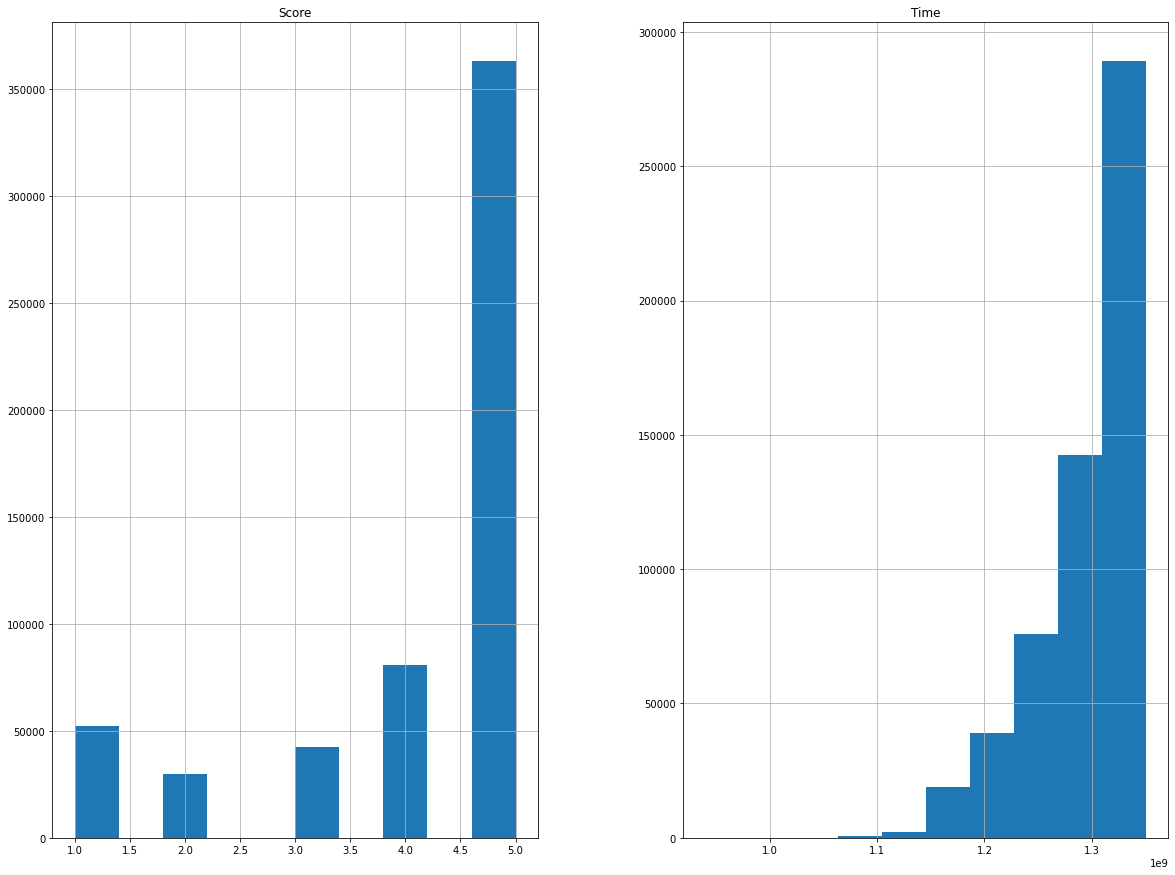

In [16]:
data.hist(figsize=(20, 15))
plt.show()

<AxesSubplot:ylabel='Score'>

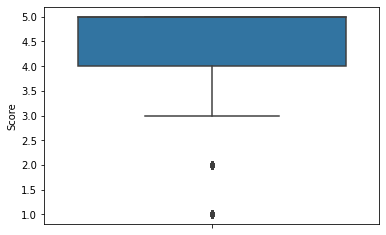

In [17]:
sns.boxplot(y='Score',data=data)

<AxesSubplot:ylabel='Time'>

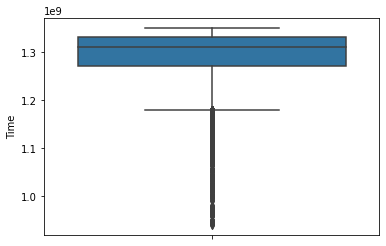

In [18]:
sns.boxplot(y='Time',data=data)

In [19]:
counts=data['UserId'].value_counts()
df1=data[data['UserId'].isin(counts[counts>=50].index)]
df1.head(30)

,ProductId,UserId,Score,Time
14,B001GVISJM,A2MUGFV2TDQ47K,5,1268352000
44,B001EO5QW8,A2G7B7FKP2O2PU,5,1209686400
46,B001EO5QW8,AQLL2R1PPR46X,5,1192752000
109,B001REEG6C,AY12DBB0U420B,5,1316390400
141,B001GVISJW,A2YIO225BTKVPU,4,1301788800
143,B001GVISJW,A1Z54EM24Y40LL,5,1269129600
186,B000NY8ODS,A1IU7S4HCK1XK0,5,1333843200
217,B0040WAG7Q,A19SDJ2TSSL8HI,3,1347667200
231,B003SO503C,A3OXRFCJI67IMN,5,1333843200
273,B000LKZK7C,A2582KMXLK2P06,5,1296777600


In [20]:
df1.shape

(22941, 4)

In [21]:
products_df = pd.DataFrame(df1.groupby('ProductId')['Score'].mean())
products_df['product_rating_counts'] = pd.DataFrame(df1.groupby('ProductId')['Score'].count())
products_df.head()

,Score,product_rating_counts
ProductId,,
7310172001,5.0,7
7310172101,5.0,7
7800648702,5.0,1
B00004CI84,4.0,3
B00004CXX9,4.0,3


In [22]:
products_df.sort_values('Score', ascending=False).head()

,Score,product_rating_counts
ProductId,,
7310172001,5.0,7
B0014P72A6,5.0,1
B0014H18J0,5.0,1
B003ESRF5I,5.0,1
B003FA0M1O,5.0,1


In [23]:
products_df.sort_values('product_rating_counts', ascending=False).head()

,Score,product_rating_counts
ProductId,,
B002IEZJMA,3.630769,65
B0041NYV8E,3.016667,60
B002IEVJRY,3.813559,59
B002LANN56,3.678571,56
B005HG9ET0,3.963636,55


In [24]:
users_df = pd.DataFrame(df1.groupby('UserId')['Score'].mean())
users_df['user_rating_counts'] = pd.DataFrame(df1.groupby('UserId')['Score'].count())
users_df.head()

,Score,user_rating_counts
UserId,,
A100WO06OQR8BQ,3.109091,55
A106ZCP7RSXMRU,4.716667,60
A1080SE9X3ECK0,4.750000,72
A10G136JEISLVR,4.019608,51
A11ED8O95W2103,4.017544,57


In [25]:
users_df.sort_values('Score', ascending=False).head()

,Score,user_rating_counts
UserId,,
A20P8VC55KPPCT,5.000000,70
A29P51TN9KKMU9,5.000000,84
A36JDIN9RAAIEC,5.000000,51
A29JUMRL1US6YP,4.988372,172
A1LZJZIHUPLDV4,4.987013,154


In [26]:
users_df.sort_values('user_rating_counts', ascending=False).head()

,Score,user_rating_counts
UserId,,
A3OXHLG6DIBRW8,4.535714,448
A1YUL9PCJR3JTY,4.494062,421
AY12DBB0U420B,4.647815,389
A281NPSIMI1C2R,4.841096,365
A1Z54EM24Y40LL,4.453125,256


In [27]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)

In [28]:
products_df.shape

(11313, 2)

In [29]:
products_df.describe()

,Score,product_rating_counts
count,11313.000000,11313.000000
mean,4.298634,2.027844
std,1.037519,3.577791
min,1.000000,1.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,2.000000
max,5.000000,65.000000


In [30]:
products_df.reset_index(level=0, inplace=True)
products_df

,ProductId,Score,product_rating_counts
0,7310172001,5.0,7
1,7310172101,5.0,7
2,7800648702,5.0,1
3,B00004CI84,4.0,3
4,B00004CXX9,4.0,3
...,...,...,...
11308,B009LT26BC,5.0,1
11309,B009M2LUEW,4.4,5
11310,B009PCDDO4,5.0,1
11311,B009QEBGIQ,5.0,1


In [31]:
x = products_df.drop("ProductId",axis=1)
y = products_df["ProductId"]

In [32]:
testSet = [[4.0,51]]
test = pd.DataFrame(testSet)
test.shape

(1, 2)

In [33]:
neigh.fit()

print(neigh.predict(test))

['B001VJ0B0I']


D:\program\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [36]:
testSet1 = [[3.0,23]]
test1 = pd.DataFrame(testSet1)
test1.shape

(1, 2)

In [37]:
print(neigh.predict(test1))

['B001LGGH54']


D:\program\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
